In [1]:
import numpy as np
from itertools import combinations_with_replacement
import matplotlib.pyplot as plt
import seaborn as sns

# Exercice 1

## 1. What is the length of the sequence in nucleotides? In codons?

In [2]:
with open("sequence.fasta", 'r') as fasta:
    next(fasta)
    data = fasta.read().replace('\n', '')

In [3]:
# sequence of the NPM1 gene
data

'CTTTCCCTGGTGTGATTCCGTCCTGCGCGGTTGTTCTCTGGAGCAGCGTTCTTTTATCTCCGTCCGCCTTCTCTCCTACCTAAGTGCGTGCCGCCACCCGATGGAAGATTCGATGGACATGGACATGAGCCCCCTGAGGCCCCAGAACTATCTTTTCGGTTGTGAACTAAAGGCCGACAAAGATTATCACTTTAAGGTGGATAATGATGAAAATGAGCACCAGTTATCTTTAAGAACGGTCAGTTTAGGGGCTGGTGCAAAGGATGAGTTGCACATTGTTGAAGCAGAGGCAATGAATTACGAAGGCAGTCCAATTAAAGTAACACTGGCAACTTTGAAAATGTCTGTACAGCCAACGGTTTCCCTTGGGGGCTTTGAAATAACACCACCAGTGGTCTTAAGGTTGAAGTGTGGTTCAGGGCCAGTGCATATTAGTGGACAGCACTTAGTAGCTGTGGAGGAAGATGCAGAGTCAGAAGATGAAGAGGAGGAGGATGTGAAACTCTTAAGTATATCTGGAAAGCGGTCTGCCCCTGGAGGTGGTAGCAAGGTTCCACAGAAAAAAGTAAAACTTGCTGCTGATGAAGATGATGACGATGATGATGAAGAGGATGATGATGAAGATGATGATGATGATGATTTTGATGATGAGGAAGCTGAAGAAAAAGCGCCAGTGAAGAAATCTATACGAGATACTCCAGCCAAAAATGCACAAAAGTCAAATCAGAATGGAAAAGACTCAAAACCATCATCAACACCAAGATCAAAAGGACAAGAATCCTTCAAGAAACAGGAAAAAACTCCTAAAACACCAAAAGGACCTAGTTCTGTAGAAGACATTAAAGCAAAAATGCAAGCAAGTATAGAAAAAGGTGGTTCTCTTCCCAAAGTGGAAGCCAAATTCATCAATTATGTGAAGAATTGCTTCCGGATGACTGACCAAGAGGCTATTCAAGATCTCTGGCAGTGGAGGAAGTCTCTTTAAGAAAATAGTTTAAA

**Length in nucleotides**

In [4]:
len(data)

1320

**Length in codons**

In [5]:
len(data)/3

440.0

## 2. What is the GC% of the sequence?

In [6]:
GCcount  =  0 # number of times G and C are found
for i in range(len(data)):
    if(data[i]== "G" or data[i] == "C" ):
        GCcount +=1
print(GCcount)

545


**We find 545 times GC in the sequence**

In [7]:
percentage = (GCcount/len(data))*100
print("GC% : ", percentage)

GC% :  41.28787878787879


## 3. Is the CTTAGTAGCTGTGGAGGAA motif present in the sequence? If so, how many time? At which positition.s?

In [8]:
sequence = np.array(["CTTAGTAGCTGTGGAGGAA"])
sequence[0] 

'CTTAGTAGCTGTGGAGGAA'

In [9]:
score = 0  # number of times the motif is found
start = 0  # position of the motif 
for i in range(len(data)):
    index = np.where(sequence==data[i:i+19])
    if (len(index[0]) != 0): # if the list is empty we didn't find CTTAGTAGCTGTGGAGGAA 
        score+=1
        start = i
print("nb CTTAGTAGCTGTGGAGGAA :",score, "position :",start)

nb CTTAGTAGCTGTGGAGGAA : 1 position : 444


**The motif is found in the sequence, but only once at position 444**

# Exercice 2

In [10]:
with open("exercise_2_sequence.fasta", 'r') as fasta:
    next(fasta)
    data_exercise2 = fasta.read().replace('\n', '')

In [11]:
data_exercise2

'ATGGAAGATTCGATGGACATGGACATGAGCCCCCTGAGGCCCCAGAACTATCTTTTTCGGTTGTGAACTAAAGGCCGACAAAGATTATCACTTTAAGGTGGATAATGATGAAAATGAGCACCAGTTATCTTTAAGAACGGTCAGTTTAGGGGCTGGTGCAAAGGATGAGTTGCACATTGTTGAAGCAGAGGCAATGAATTACGAAGGCAGTCCAATTAAAGGTAACACTGGCAACTTTGAAAATGTCTGTACAGCCAACGGTTTCCACTTGGGGGCTTTGAAATAACACCACCAGTGGTCTTAAGGTTGAAGTGTGGTTCAGGGCCAGTGCATATTAGTGGACAGCACTTAGTAGCTGTGGAGGAAGATGCAGAGTCAGAAGATGAAGAGGAGGAGGATGTGAAACTCTTAAGTATATCTGGAAAGCGGTCTGCCCCTGGAGGTGGTGCAAGGTTCCACAGAAAAAAGTAAAACTTGCTGCTGATGAAGATGATGACGATGATGATGAAGAGGATGATGATGAAGATGATGATGATGATGATTTTGATGATGAGGAAGCTGAAGAAAAAGCGCCAGTGAAGAAATCTATACGAGATACTCCAGCCAAAAATGCACAAAAGTCAAATCAGAATGGAAAAGACTCCAAAACCATCATCAACACCAAGATCAAAAGGACAAGAATCCTTCAAGAAACAGGAAAAAACTCCTAAAACACCAAAAGGACCTAGTTCTGTAGAAGACATTAAAGCAAAAATGCAAGCAAGTATAGAAAAAGGTGGTTCTCTTCCCAAAGTGGAAGCCAAATTCATCAATTATGTGACAGAATTGCTTCCGGATGACTGACCAAGAGGCTATTCAAATCTCTGGCAGTGGAGGAAGTCTCTTTAA'

**We can study the frequency of motifs (k-mers) in the two sequences to quantify their similarity**

In [12]:
alphabet = ["A", "C", "T", "G"]

In [13]:
def kmers_count(genom, k=2, alphabet=alphabet):
    labels = np.array(list(combinations_with_replacement(alphabet, k)))
    labels_string = []
    for i in range(len(labels)):
        labels_string.append(''.join(labels[i]))
    labels_string = np.array(labels_string)
    scores = np.zeros(len(labels))
    for i in range(len(genom)):
        index = np.where(labels_string==genom[i:i+k])
        scores[index] += 1
    
    return labels_string, scores

In [14]:
def profile_plot(labels, scores, namefig, xlabel, ylabel, fontsize=5):
    custom_params = {"axes.spines.right": False, 
                     "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    plt.figure(figsize=(10,5))
    plt.bar(labels, scores, color="blue", alpha=0.25)
    plt.xticks(fontsize=fontsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(namefig)
    plt.gcf().set_dpi(300)
    plt.show()
    plt.clf()

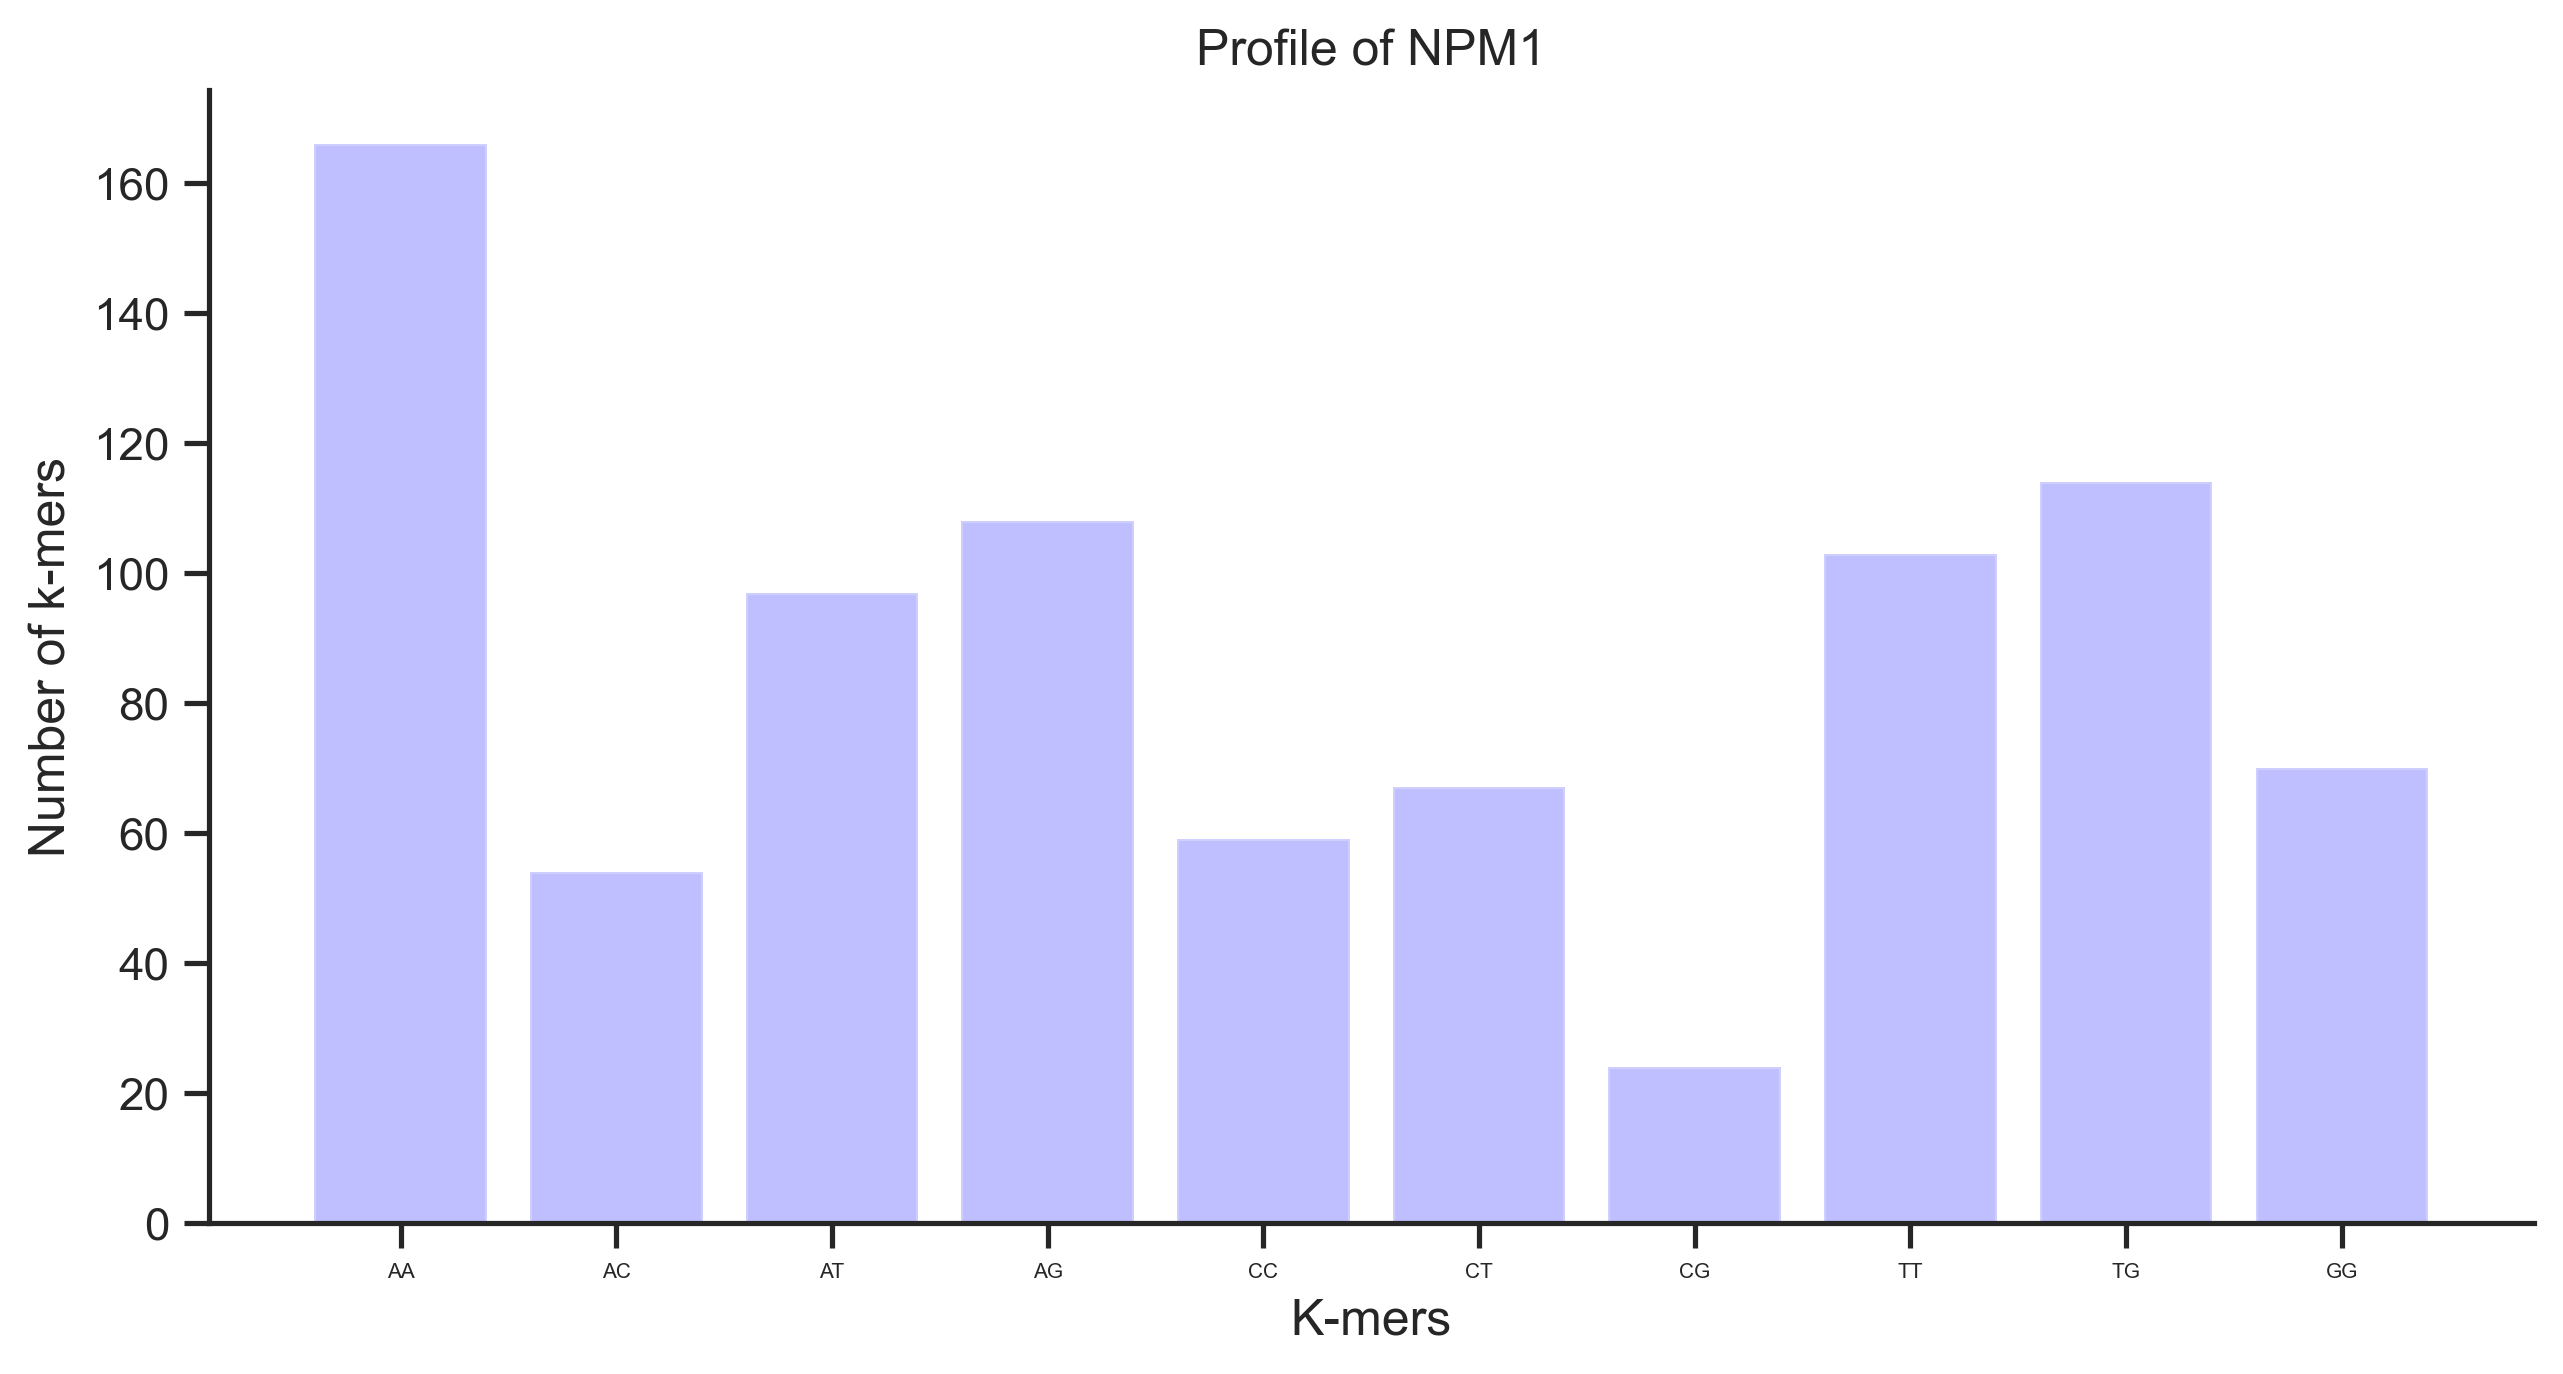

<Figure size 432x288 with 0 Axes>

In [15]:
labels, scores_NPM1 = kmers_count(data, 2)
profile_plot(labels, 
             scores_NPM1, 
             "Profile of NPM1", 
             "K-mers", 
             "Number of k-mers")

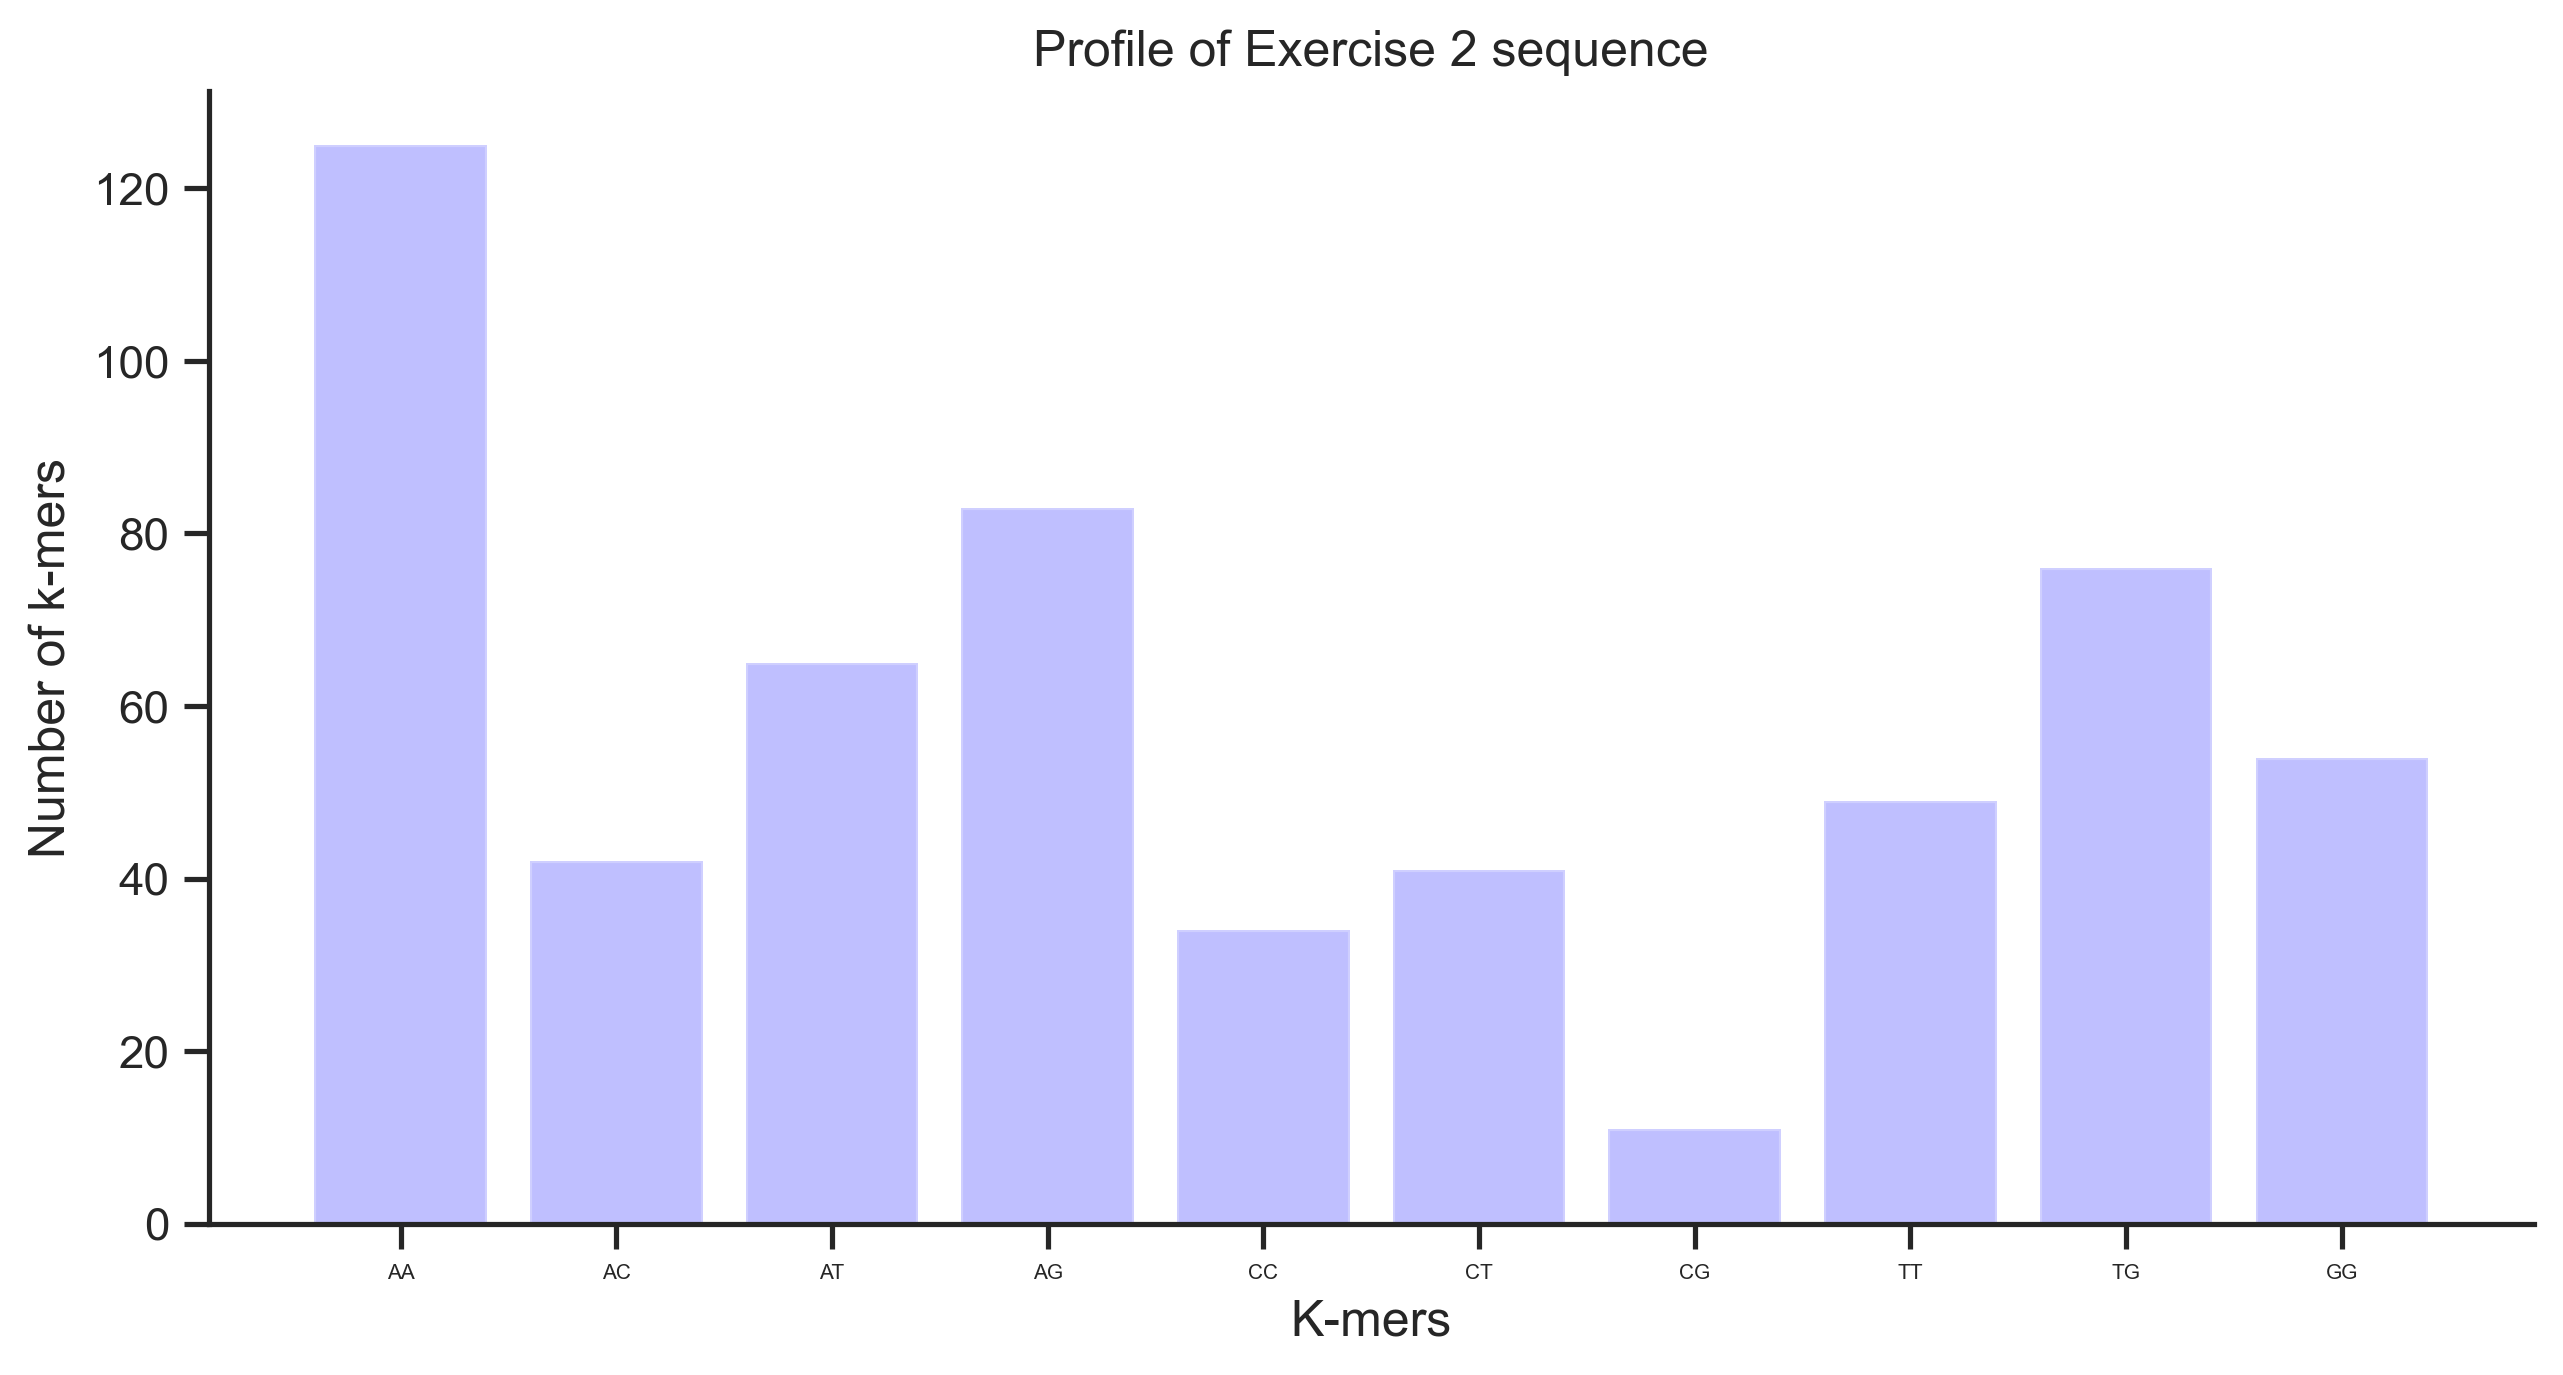

<Figure size 432x288 with 0 Axes>

In [16]:
labels, scores_Exercise2 = kmers_count(data_exercise2, 2)
profile_plot(labels, 
             scores_Exercise2, 
             "Profile of Exercise 2 sequence", 
             "K-mers", 
             "Number of k-mers")

In [17]:
def plot_kmer_differences(seq1,seq2,kmax):
    for k in range(2, kmax):
        labels, scores_NPM1 = kmers_count(seq1, k)
        labels, scores_Exercise2 = kmers_count(seq2, k)
        profile_plot(labels, 
             abs(scores_NPM1 - scores_Exercise2), 
             "Difference of K-mers between the two sequences : K = " +str(k), 
             "K-mers", 
             "Number of k-mers")
        

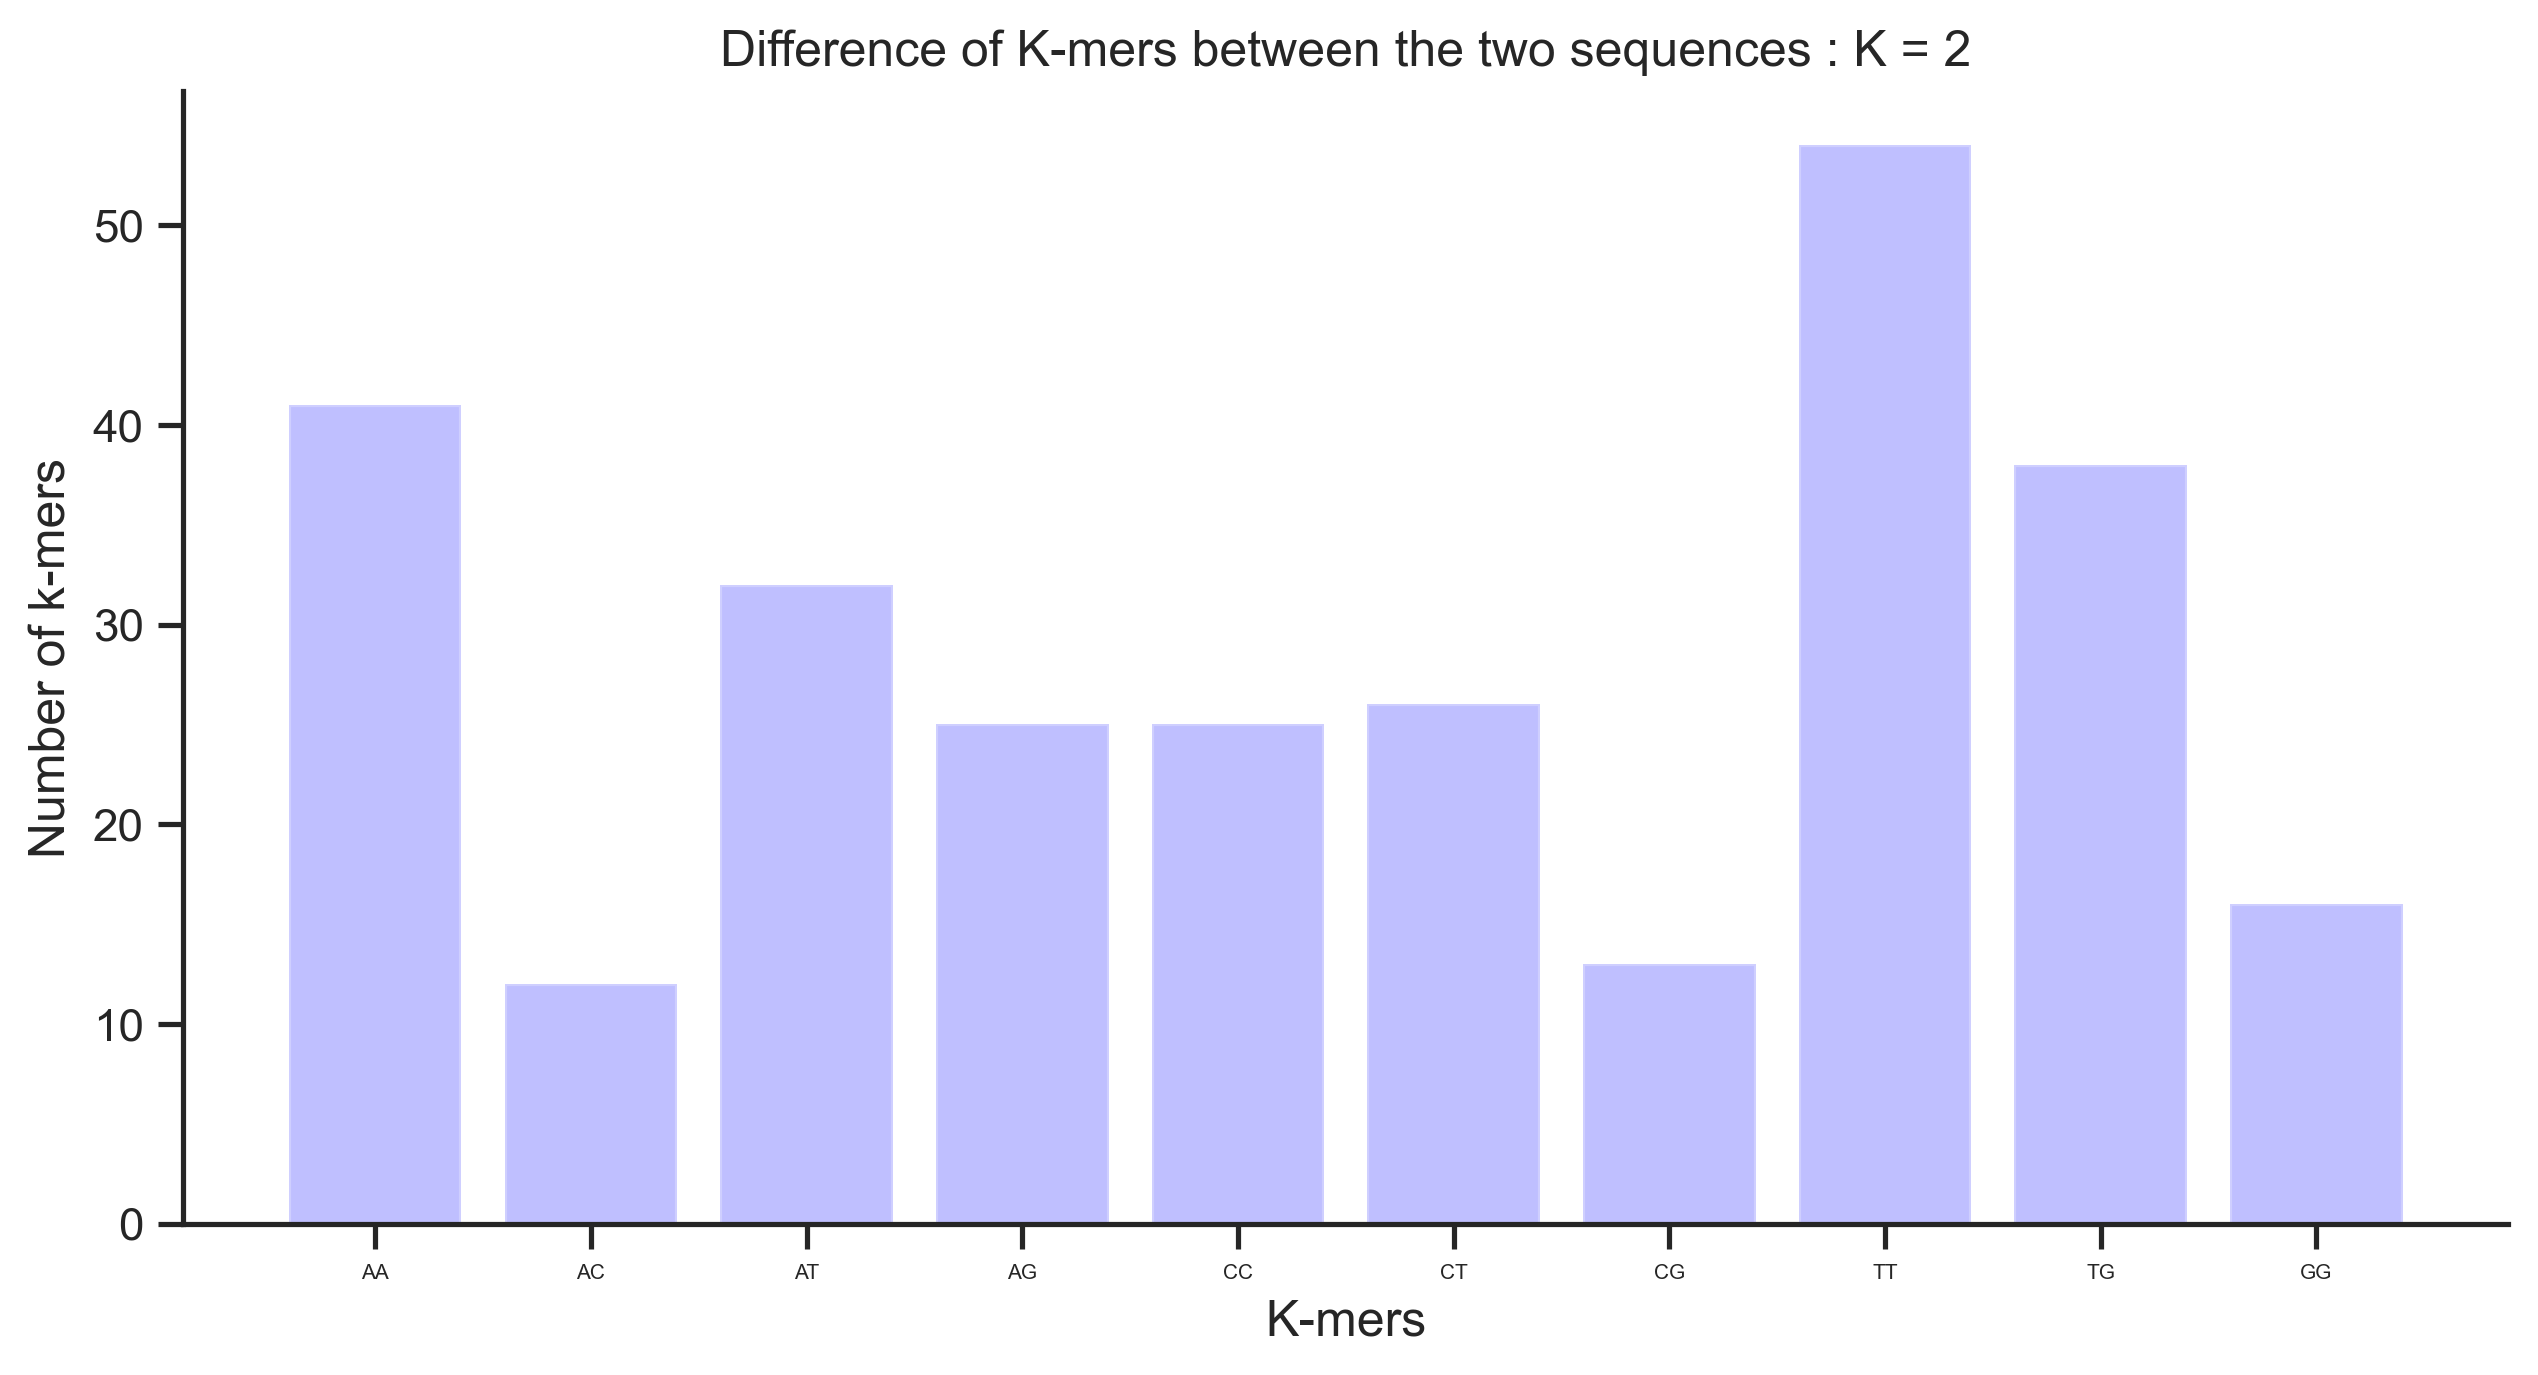

<Figure size 432x288 with 0 Axes>

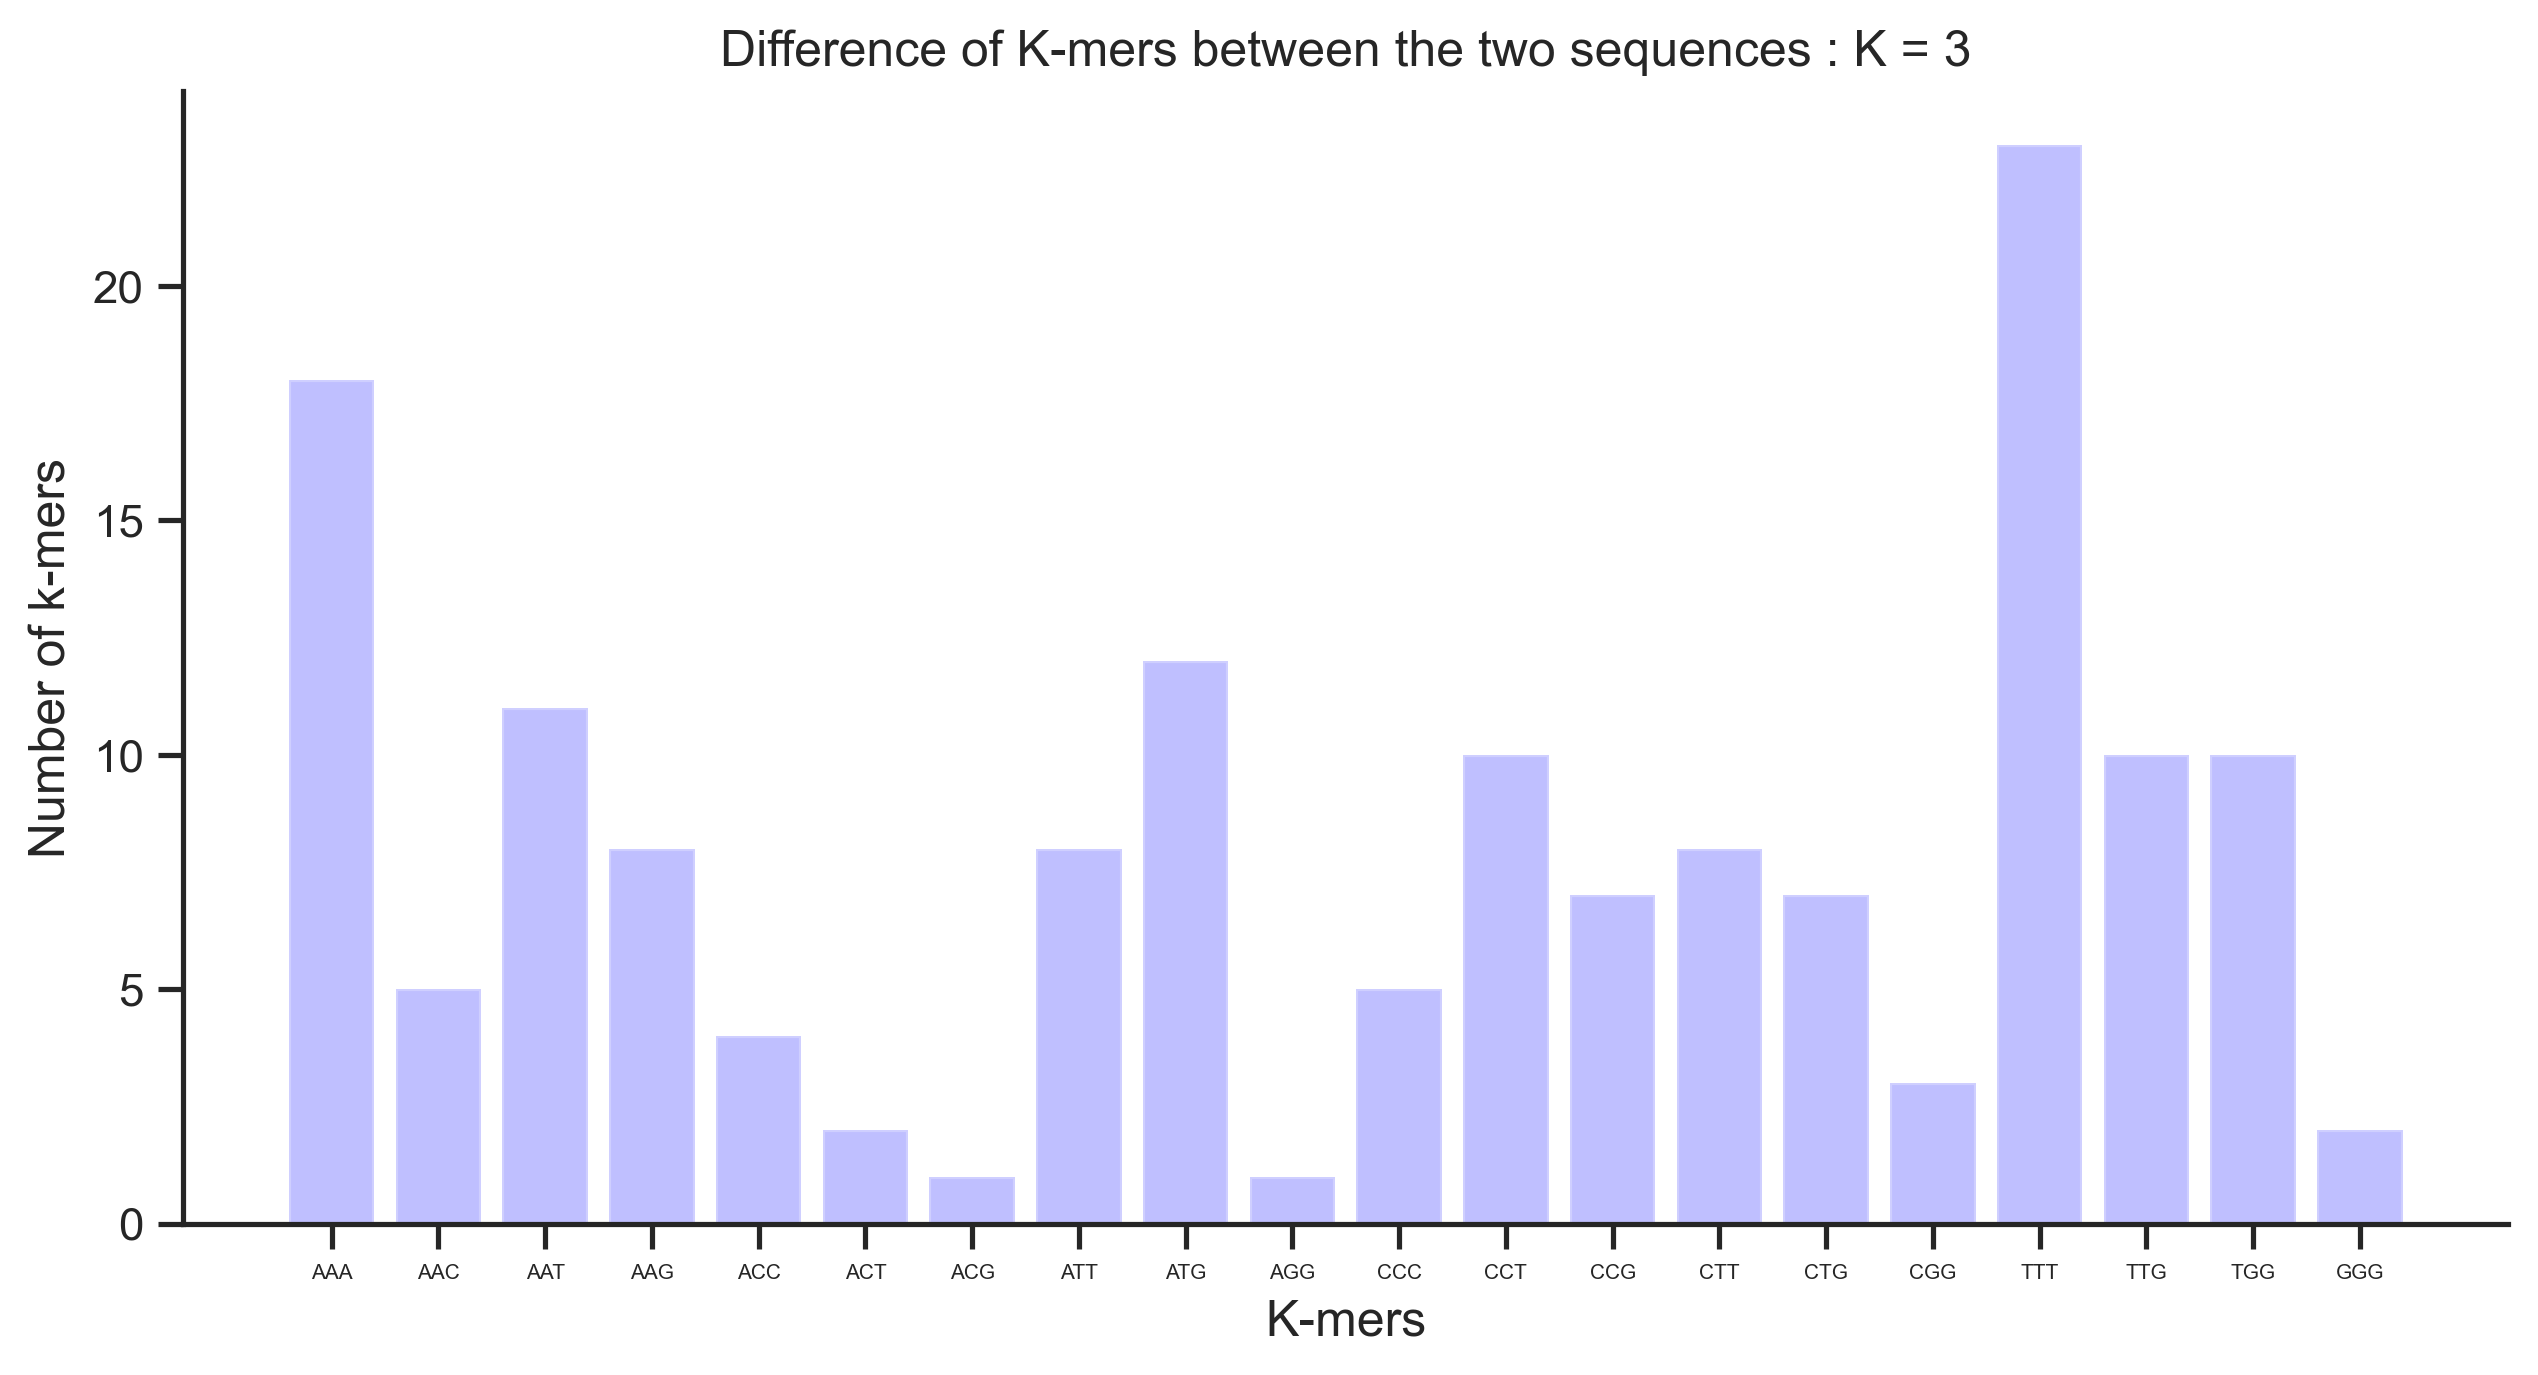

<Figure size 432x288 with 0 Axes>

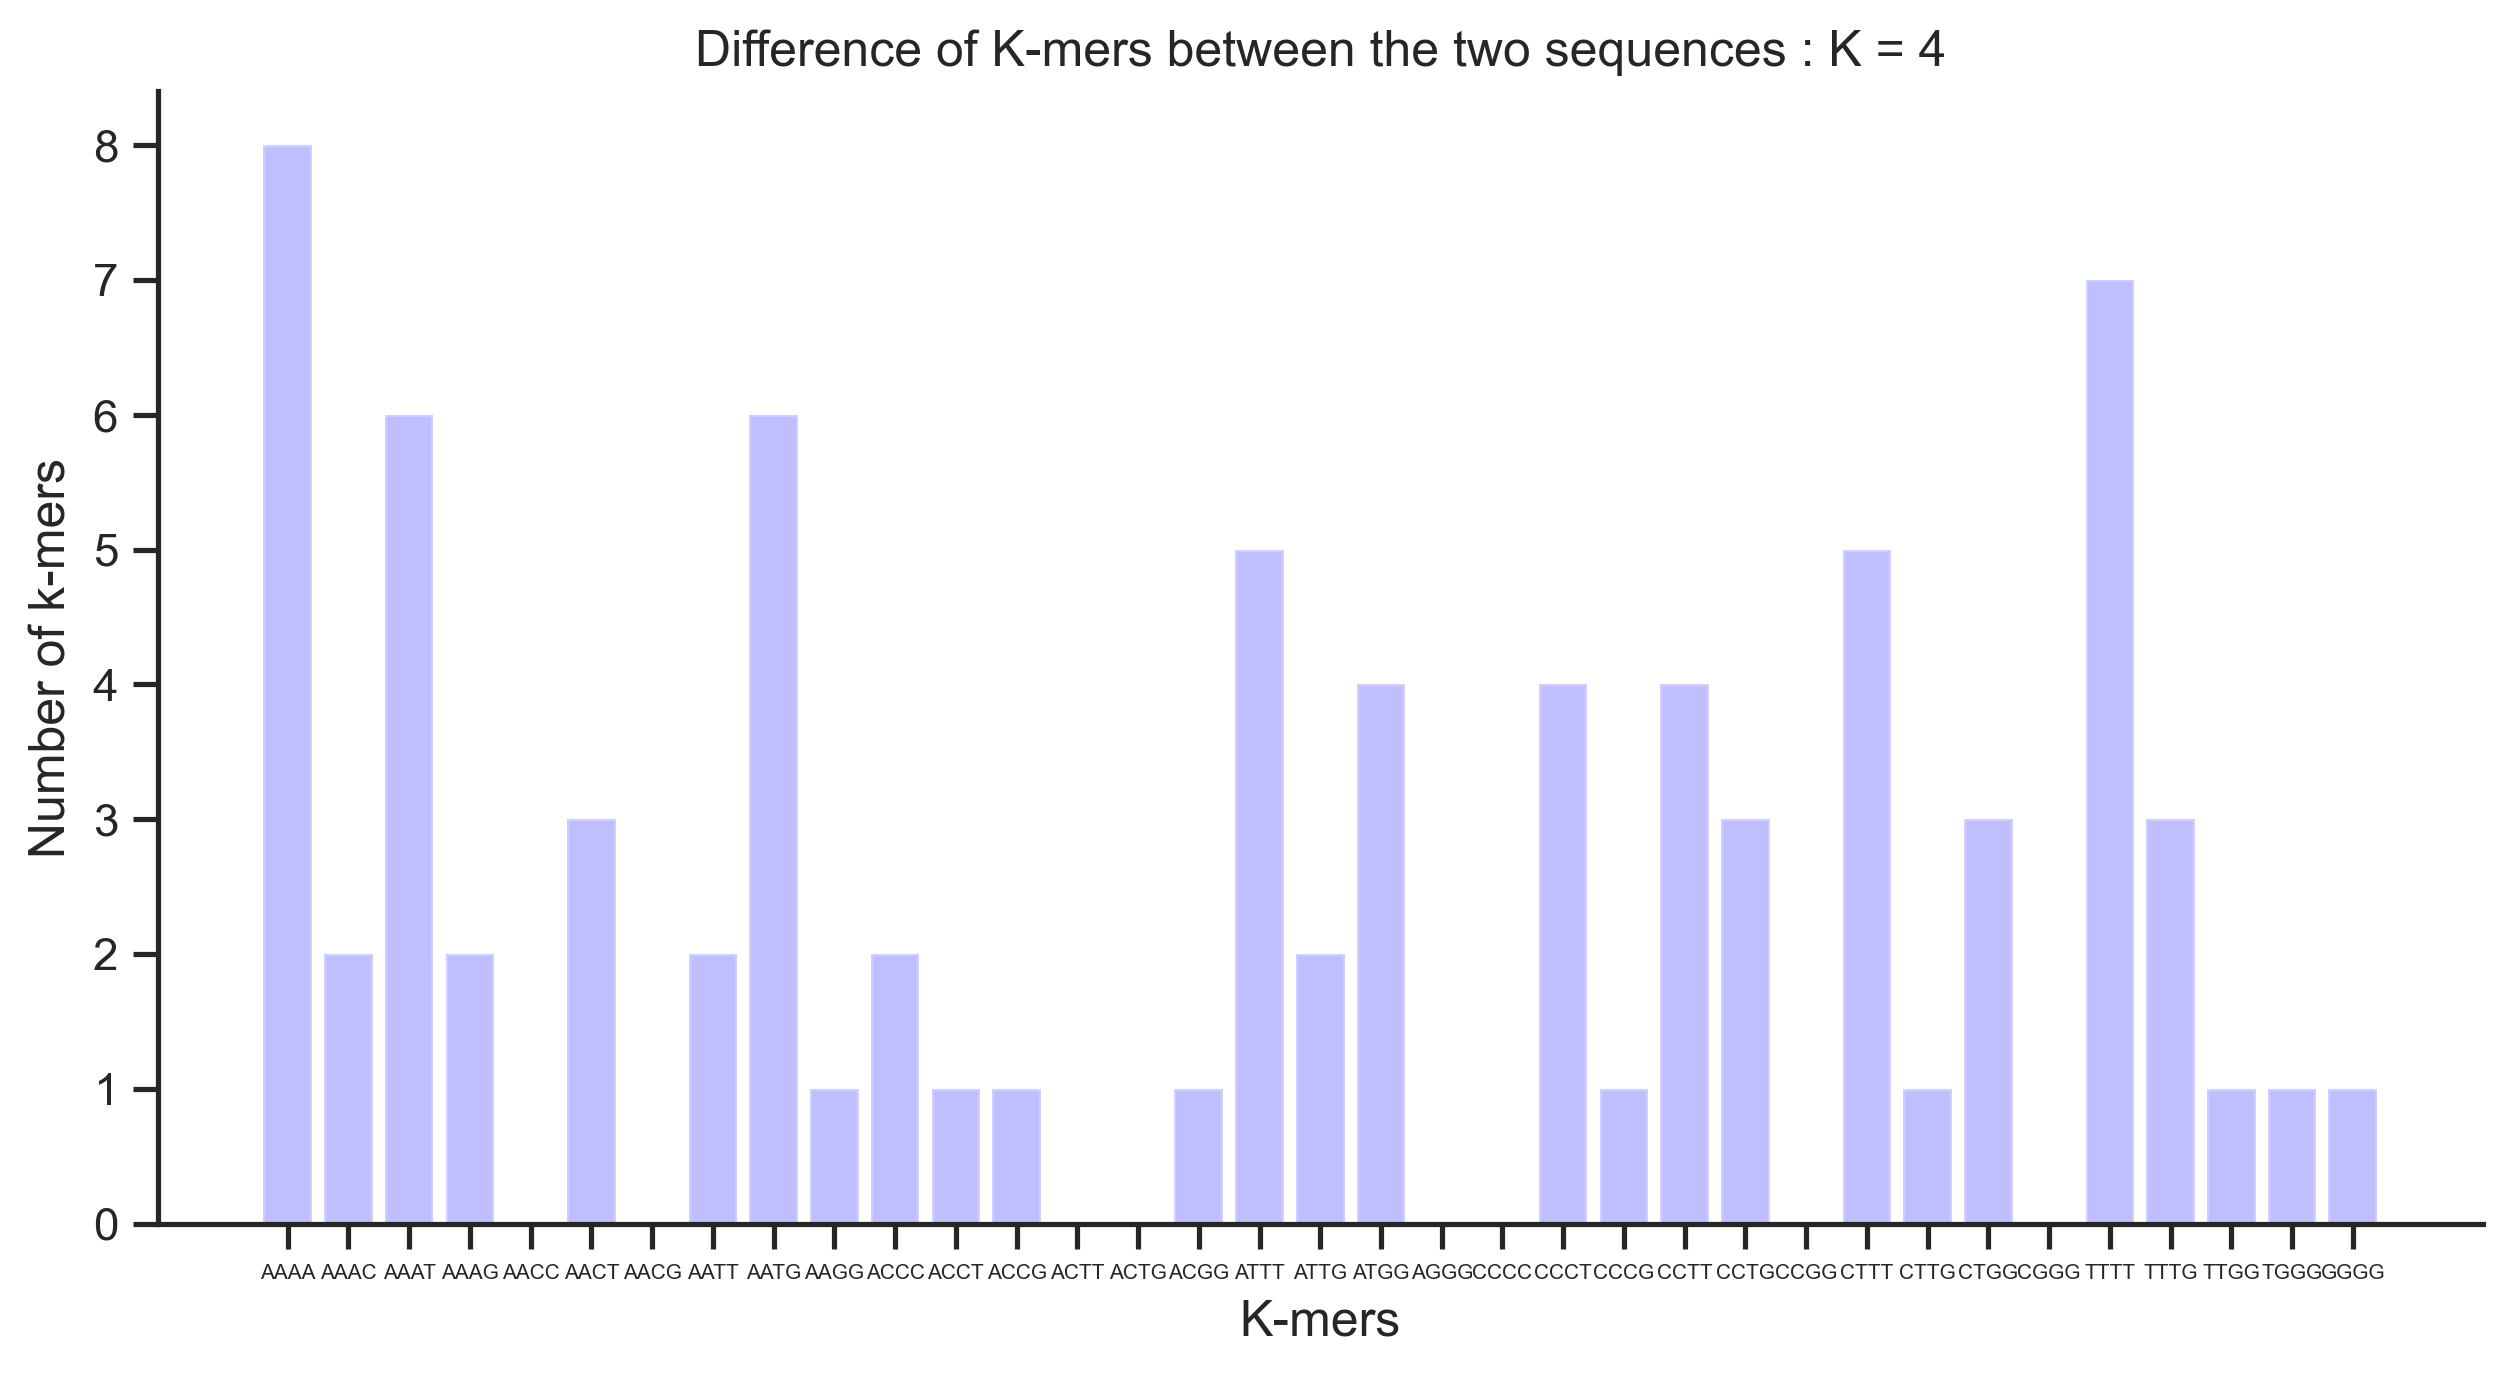

<Figure size 432x288 with 0 Axes>

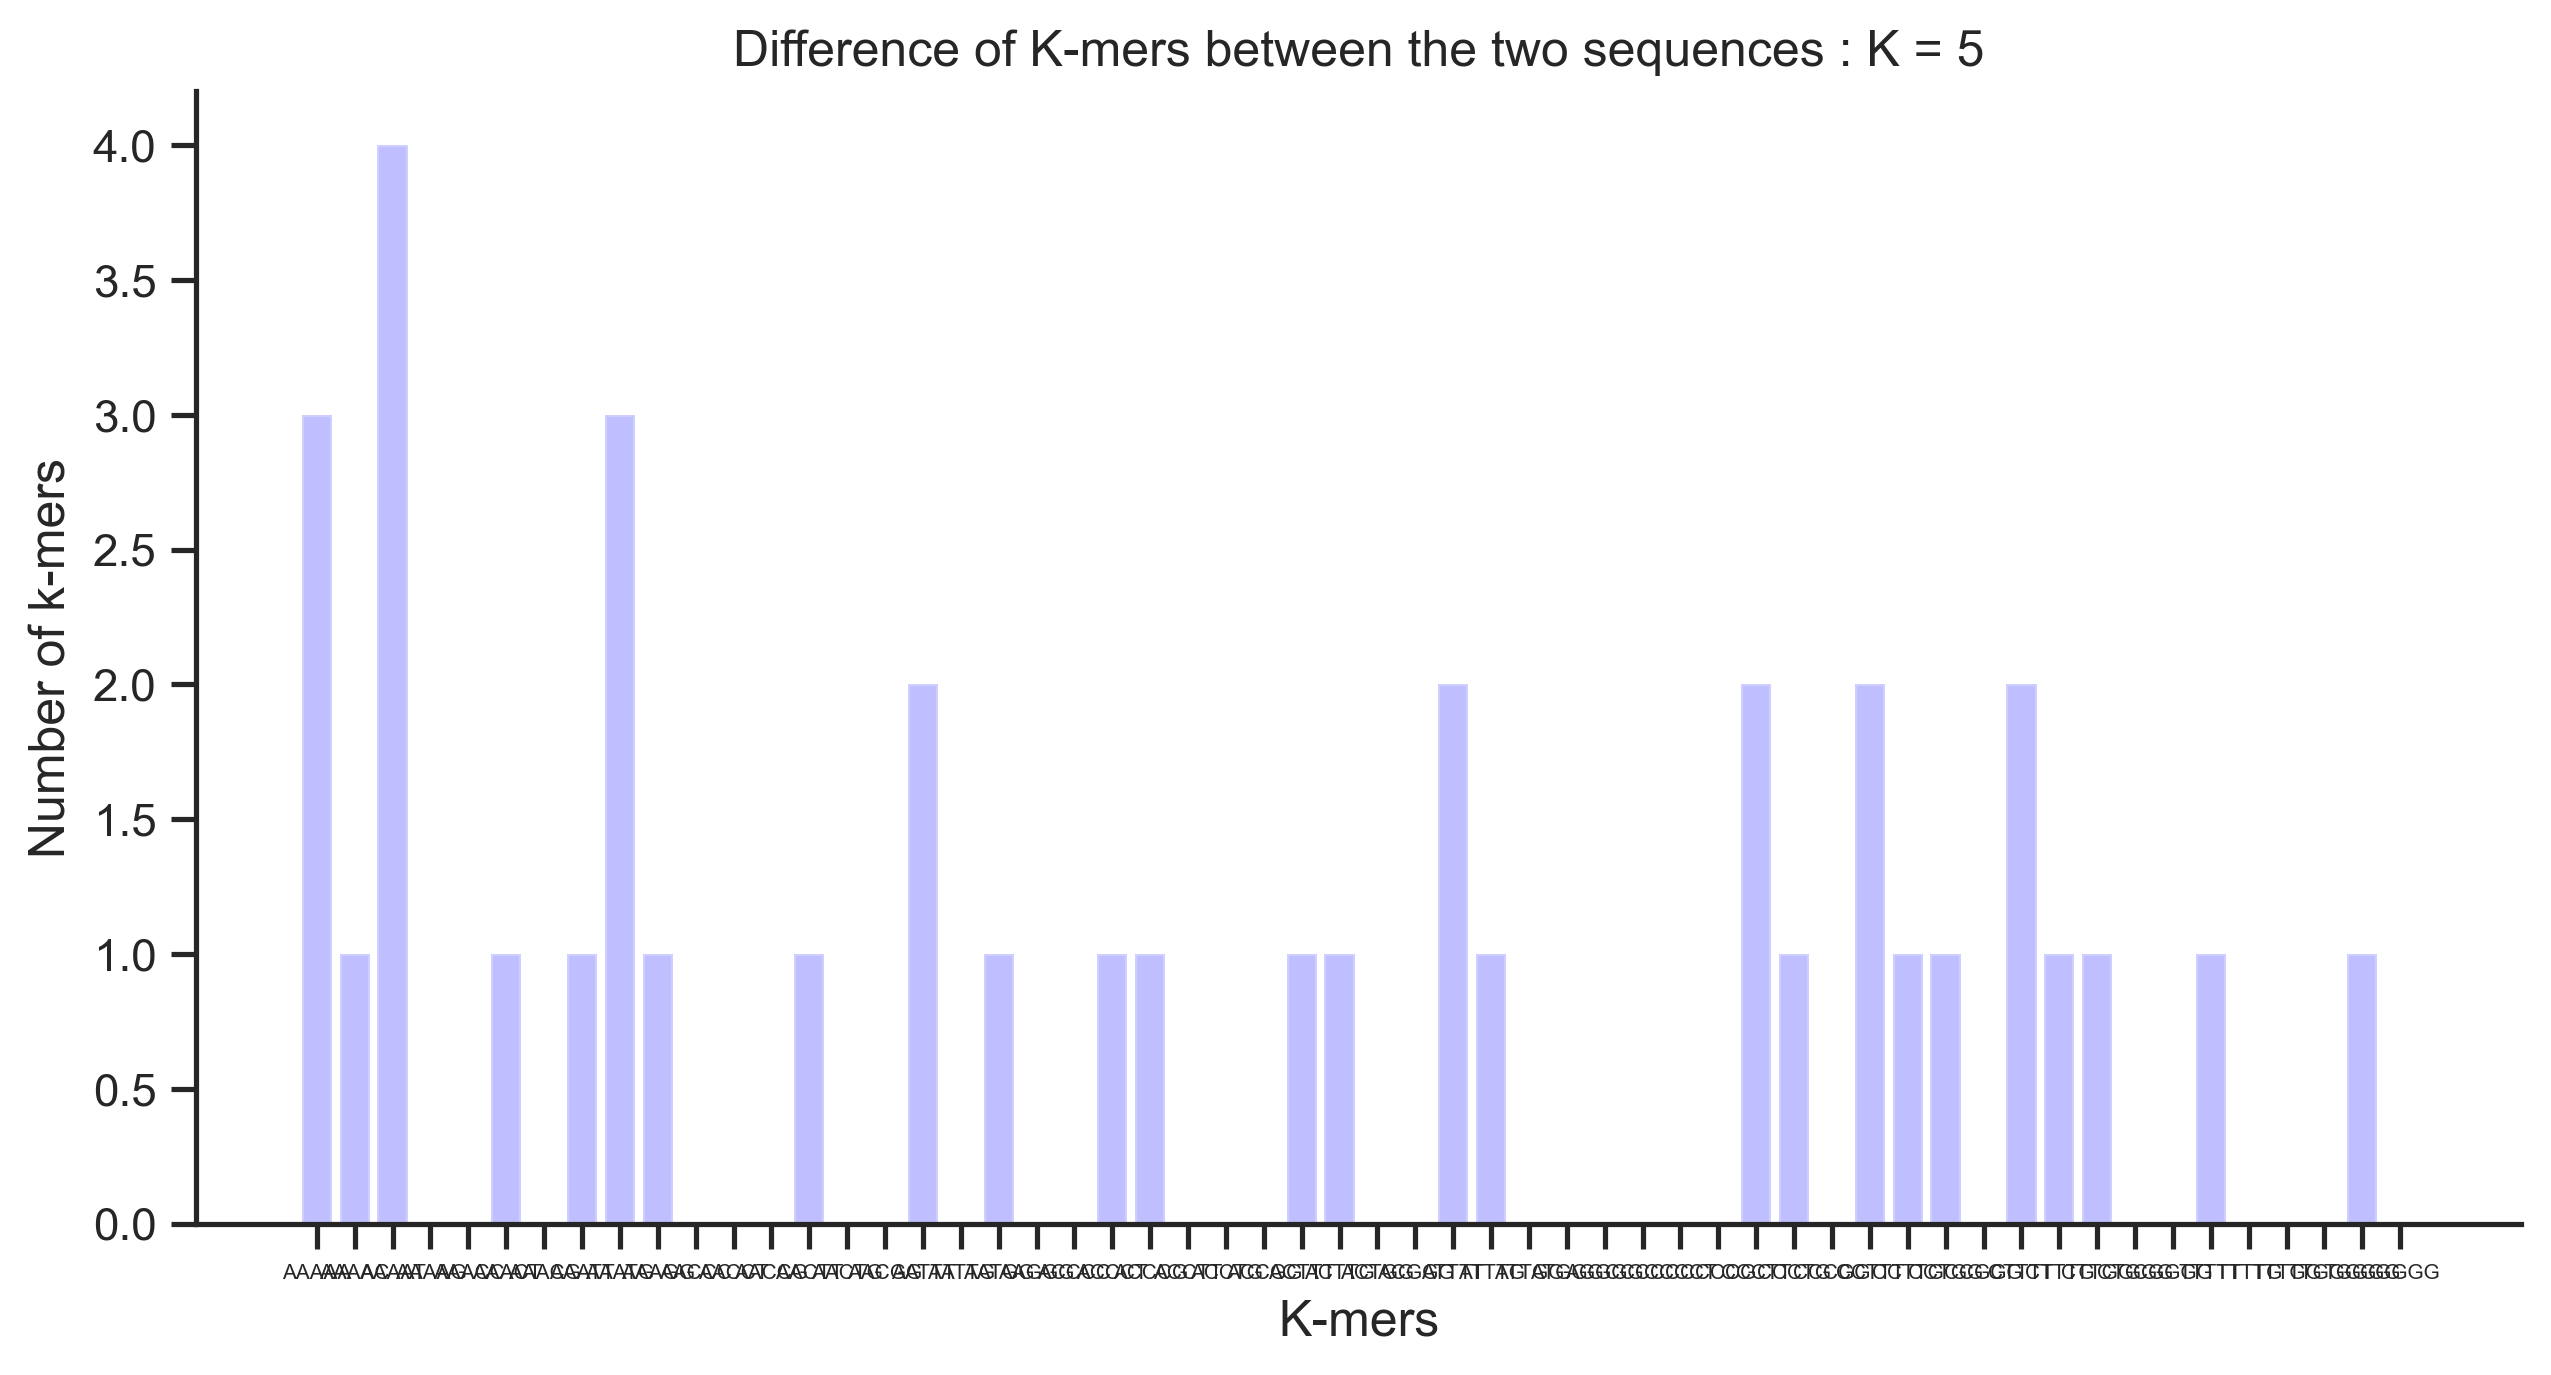

<Figure size 432x288 with 0 Axes>

In [18]:
plot_kmer_differences(data,data_exercise2,6)

**We can also perform an alignment between our two sequences**

In [19]:
from Bio.SeqUtils import GC
from Bio import Align

In [20]:
aligner = Align.PairwiseAligner()
alignments = aligner.align(data, data_exercise2)

In [21]:
alignment = alignments[0]
print("Score = %.1f:" % alignment.score)
print(alignment)

Score = 884.0:
CTTTCCCTGGTGTGATTCCGTCCTGCGCGGTTGTTCTCTGGAGCAGCGTTCTTTTATCTCCGTCCGCCTTCTCTCCTACCTAAGTGCGTGCCGCCACCCGATGGAAGATTCGATGGACATGGACATGAGCCCCCTGAGGCCCCAGAACTATCTTTT-CGGTTGTGAACTAAAGGCCGACAAAGATTATCACTTTAAGGTGGATAATGATGAAAATGAGCACCAGTTATCTTTAAGAACGGTCAGTTTAGGGGCTGGTGCAAAGGATGAGTTGCACATTGTTGAAGCAGAGGCAATGAATTACGAAGGCAGTCCAATTAAAG-TAACACTGGCAACTTTGAAAATGTCTGTACAGCCAACGGTTTCC-CTTGGGGGCTTTGAAATAACACCACCAGTGGTCTTAAGGTTGAAGTGTGGTTCAGGGCCAGTGCATATTAGTGGACAGCACTTAGTAGCTGTGGAGGAAGATGCAGAGTCAGAAGATGAAGAGGAGGAGGATGTGAAACTCTTAAGTATATCTGGAAAGCGGTCTGCCCCTGGAGGTGGTAGCAAGGTTCCACAGAAAAAAGTAAAACTTGCTGCTGATGAAGATGATGACGATGATGATGAAGAGGATGATGATGAAGATGATGATGATGATGATTTTGATGATGAGGAAGCTGAAGAAAAAGCGCCAGTGAAGAAATCTATACGAGATACTCCAGCCAAAAATGCACAAAAGTCAAATCAGAATGGAAAAGACTC-AAAACCATCATCAACACCAAGATCAAAAGGACAAGAATCCTTCAAGAAACAGGAAAAAACTCCTAAAACACCAAAAGGACCTAGTTCTGTAGAAGACATTAAAGCAAAAATGCAAGCAAGTATAGAAAAAGGTGGTTCTCTTCCCAAAGTGGAAGCCAAATTCATCAATTATGTGAAGAATTGCTTCCGGATGACTGACCAAGAGGCTATTCAAGATCTCTGGCAGTGGAGGAAGTCTCT

In [23]:
aligner.mode = 'local'
alignments = aligner.align(data, data_exercise2)
alignment = alignments[0]
print("Score = %.1f:" % alignment.score)
print(alignment)

Score = 884.0:
CTTTCCCTGGTGTGATTCCGTCCTGCGCGGTTGTTCTCTGGAGCAGCGTTCTTTTATCTCCGTCCGCCTTCTCTCCTACCTAAGTGCGTGCCGCCACCCGATGGAAGATTCGATGGACATGGACATGAGCCCCCTGAGGCCCCAGAACTATCTTTT-CGGTTGTGAACTAAAGGCCGACAAAGATTATCACTTTAAGGTGGATAATGATGAAAATGAGCACCAGTTATCTTTAAGAACGGTCAGTTTAGGGGCTGGTGCAAAGGATGAGTTGCACATTGTTGAAGCAGAGGCAATGAATTACGAAGGCAGTCCAATTAAAG-TAACACTGGCAACTTTGAAAATGTCTGTACAGCCAACGGTTTCC-CTTGGGGGCTTTGAAATAACACCACCAGTGGTCTTAAGGTTGAAGTGTGGTTCAGGGCCAGTGCATATTAGTGGACAGCACTTAGTAGCTGTGGAGGAAGATGCAGAGTCAGAAGATGAAGAGGAGGAGGATGTGAAACTCTTAAGTATATCTGGAAAGCGGTCTGCCCCTGGAGGTGGTAGCAAGGTTCCACAGAAAAAAGTAAAACTTGCTGCTGATGAAGATGATGACGATGATGATGAAGAGGATGATGATGAAGATGATGATGATGATGATTTTGATGATGAGGAAGCTGAAGAAAAAGCGCCAGTGAAGAAATCTATACGAGATACTCCAGCCAAAAATGCACAAAAGTCAAATCAGAATGGAAAAGACTC-AAAACCATCATCAACACCAAGATCAAAAGGACAAGAATCCTTCAAGAAACAGGAAAAAACTCCTAAAACACCAAAAGGACCTAGTTCTGTAGAAGACATTAAAGCAAAAATGCAAGCAAGTATAGAAAAAGGTGGTTCTCTTCCCAAAGTGGAAGCCAAATTCATCAATTATGTGAAGAATTGCTTCCGGATGACTGACCAAGAGGCTATTCAAGATCTCTGGCAGTGGAGGAAGTCTCT